Load all packages you need.

In [1]:
import pandas as pd

Read the data.

In [2]:
df = pd.read_csv("/Users/davidsuss/Documents/GitHub/Applied-Analytics/data/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Bin the variable "Age" into useful intervals. Inspect the bins.

In [8]:
import pandas as pd

# Definiere sinnvolle Altersgruppen
bins = [0, 20, 30, 40, 50, 60, 70, 100]
labels = ["0-19", "20-29", "30-39", "40-49", "50-59", "60-69", "70+"]

# Wende das Binning auf die Altersvariable an
df["Age_Binned"] = pd.cut(df["Age"], bins=bins, labels=labels, right=False)

# Zähle die Anzahl der Einträge je Altersgruppe
age_counts = df["Age_Binned"].value_counts().sort_index()

# Zeige die Anzahl der Records je Altersgruppe an
print(age_counts)
print(df)

Age_Binned
0-19       0
20-29    396
30-39    165
40-49    118
50-59     57
60-69     29
70+        3
Name: count, dtype: int64
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31   

The distribution of the serum "Insulin" seems to be skewed. <br> Create a histogram of the Insulin levels. Perform a log-transformation on the "Insulin" variable and recreate the histogram. What do you notice?

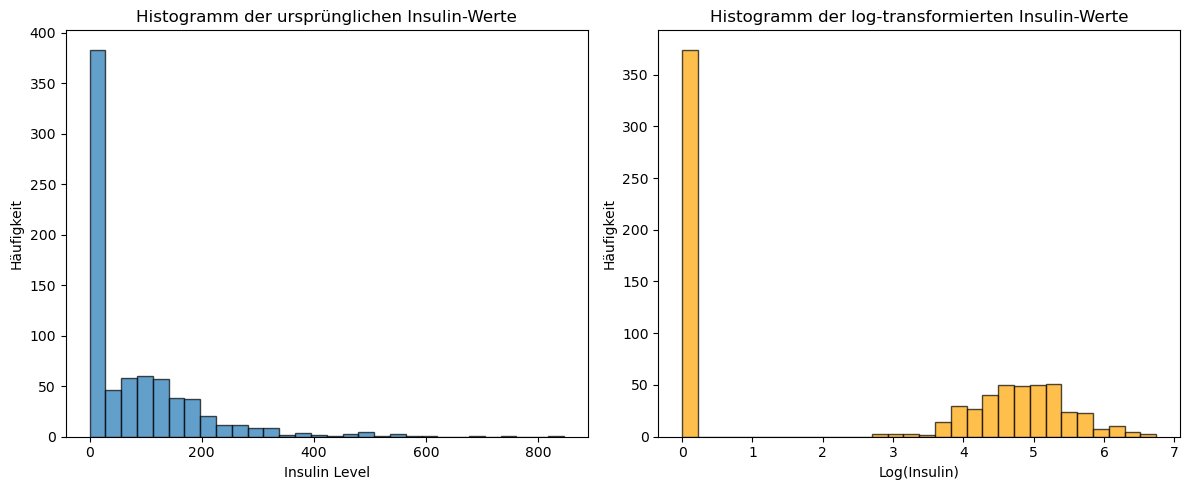

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Erstelle ein Histogramm für die ursprüngliche Insulin-Verteilung
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(df["Insulin"], bins=30, edgecolor="black", alpha=0.7)
plt.title("Histogramm der ursprünglichen Insulin-Werte")
plt.xlabel("Insulin Level")
plt.ylabel("Häufigkeit")

# Log-Transformation der Insulin-Werte (mit +1, um log(0) zu vermeiden)
df["Insulin_Log"] = np.log1p(df["Insulin"])

# Erstelle ein Histogramm für die transformierte Insulin-Verteilung
plt.subplot(1, 2, 2)
plt.hist(df["Insulin_Log"], bins=30, edgecolor="black", alpha=0.7, color="orange")
plt.title("Histogramm der log-transformierten Insulin-Werte")
plt.xlabel("Log(Insulin)")
plt.ylabel("Häufigkeit")

plt.tight_layout()
plt.show()


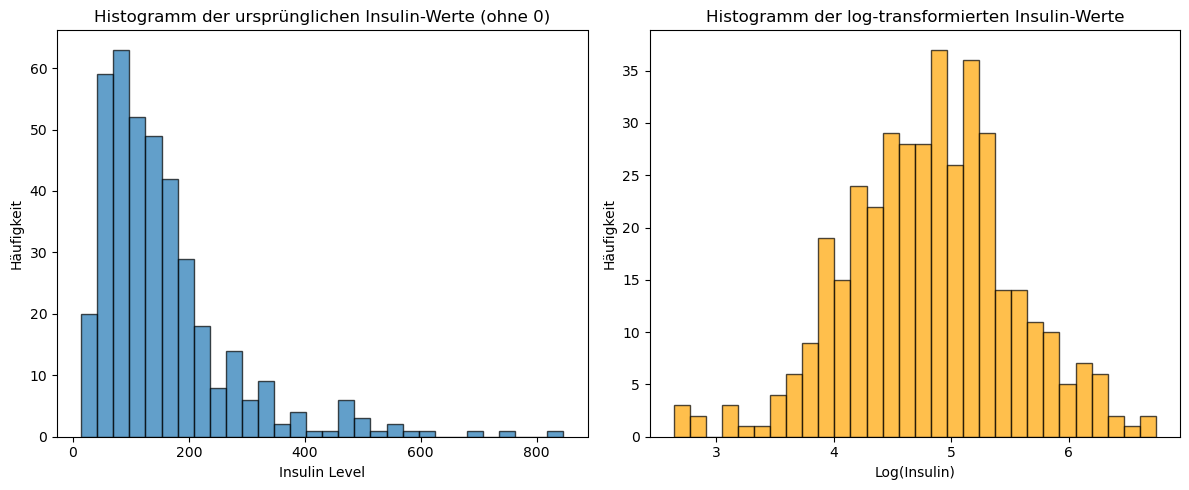

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Entferne 0-Werte aus der Insulin-Spalte
df_nonzero = df[df["Insulin"] > 0].copy()

# Erstelle ein Histogramm für die ursprüngliche Insulin-Verteilung (ohne 0-Werte)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(df_nonzero["Insulin"], bins=30, edgecolor="black", alpha=0.7)
plt.title("Histogramm der ursprünglichen Insulin-Werte (ohne 0)")
plt.xlabel("Insulin Level")
plt.ylabel("Häufigkeit")

# Log-Transformation der Insulin-Werte
df_nonzero["Insulin_Log"] = np.log(df_nonzero["Insulin"])

# Erstelle ein Histogramm für die transformierte Insulin-Verteilung
plt.subplot(1, 2, 2)
plt.hist(df_nonzero["Insulin_Log"], bins=30, edgecolor="black", alpha=0.7, color="orange")
plt.title("Histogramm der log-transformierten Insulin-Werte")
plt.xlabel("Log(Insulin)")
plt.ylabel("Häufigkeit")

plt.tight_layout()
plt.show()
